In [1]:
import numpy as np
import seaborn as sns

In [2]:
#The amount of profit with web design A & web design B
a = np.array([21, 19, 41, 31, 25, 18, 35, 17, 29, 24, 20, 33])
b = np.array([20, 32, 25, 26, 19, 43, 30, 28, 34, 25, 36, 45])

In [3]:
a.mean()

26.083333333333332

In [4]:
b.mean()

30.25

In [5]:
d = b.mean() - a.mean()
d

4.166666666666668

In [6]:
np.append(np.zeros(len(a)), np.ones(len(b)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [7]:
data = np.array([
    np.append(np.zeros(len(a)), np.ones(len(b))),
    np.append(a, b)
])

In [8]:
print(data)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.]
 [21. 19. 41. 31. 25. 18. 35. 17. 29. 24. 20. 33. 20. 32. 25. 26. 19. 43.
  30. 28. 34. 25. 36. 45.]]


In [9]:
data_t = data.T

In [10]:
data_t

array([[ 0., 21.],
       [ 0., 19.],
       [ 0., 41.],
       [ 0., 31.],
       [ 0., 25.],
       [ 0., 18.],
       [ 0., 35.],
       [ 0., 17.],
       [ 0., 29.],
       [ 0., 24.],
       [ 0., 20.],
       [ 0., 33.],
       [ 1., 20.],
       [ 1., 32.],
       [ 1., 25.],
       [ 1., 26.],
       [ 1., 19.],
       [ 1., 43.],
       [ 1., 30.],
       [ 1., 28.],
       [ 1., 34.],
       [ 1., 25.],
       [ 1., 36.],
       [ 1., 45.]])

In [11]:
np.random.shuffle(data_t[:, 0])

In [12]:
data_t

array([[ 1., 21.],
       [ 0., 19.],
       [ 0., 41.],
       [ 1., 31.],
       [ 0., 25.],
       [ 1., 18.],
       [ 1., 35.],
       [ 0., 17.],
       [ 1., 29.],
       [ 0., 24.],
       [ 1., 20.],
       [ 0., 33.],
       [ 1., 20.],
       [ 1., 32.],
       [ 1., 25.],
       [ 0., 26.],
       [ 1., 19.],
       [ 0., 43.],
       [ 0., 30.],
       [ 1., 28.],
       [ 0., 34.],
       [ 0., 25.],
       [ 1., 36.],
       [ 0., 45.]])

In [13]:
experiment_label = np.random.randint(0, 2, len(data_t))
experiment_label

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0])

In [14]:
experiment_data = np.array([
    experiment_label,
    np.append(a, b)
])

In [15]:
experiment_data

array([[ 0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,  1,  0,
         1,  1,  1,  1,  0,  0,  0,  0],
       [21, 19, 41, 31, 25, 18, 35, 17, 29, 24, 20, 33, 20, 32, 25, 26,
        19, 43, 30, 28, 34, 25, 36, 45]])

In [16]:
experiment_data_t = experiment_data.T

In [17]:
experiment_data_t


array([[ 0, 21],
       [ 1, 19],
       [ 1, 41],
       [ 1, 31],
       [ 0, 25],
       [ 0, 18],
       [ 0, 35],
       [ 1, 17],
       [ 0, 29],
       [ 1, 24],
       [ 1, 20],
       [ 1, 33],
       [ 0, 20],
       [ 0, 32],
       [ 1, 25],
       [ 0, 26],
       [ 1, 19],
       [ 1, 43],
       [ 1, 30],
       [ 1, 28],
       [ 0, 34],
       [ 0, 25],
       [ 0, 36],
       [ 0, 45]])

In [18]:
ma = experiment_data_t[experiment_data_t[:, 0] == 0][:, 1].mean()
ma

28.833333333333332

In [19]:
mb = experiment_data_t[experiment_data_t[:, 0] == 1][:, 1].mean()
mb

27.5

In [21]:
def sh_exp(N):
    experiment_data_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(data_t))
        experiment_data = np.array([
            experiment_label,
            data_t[:, 1]
        ]).T
        experiment_data_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_data_mean

In [28]:
e = sh_exp(1000)

In [30]:
e1 = e[e >= d]

In [35]:
len(e1)

126

<AxesSubplot:ylabel='Count'>

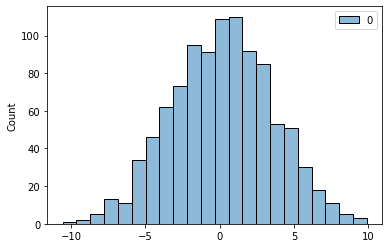

In [36]:
sns.histplot(e)